In [1]:
filename = "sysinfo.csv"

In [2]:
import matplotlib.pyplot as plt
import sys
import numpy as np
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess

In [3]:
cpu_data = pd.read_csv(filename, parse_dates=[3])

In [4]:
loess_smoothed = lowess(cpu_data['temperature'], cpu_data['timestamp'], frac = 0.05)

In [5]:
from pykalman import KalmanFilter

In [6]:
kalman_data = cpu_data[['temperature', 'cpu_percent', 'sys_load_1']]

In [7]:
initial_state = kalman_data.iloc[0]
ob_stddev = 1.5
trans_stddev = 0.5
observation_covariance = np.diag([ob_stddev, ob_stddev, ob_stddev]) ** 2 # TODO: shouldn't be zero
transition_covariance = np.diag([trans_stddev, trans_stddev, trans_stddev]) ** 2 # TODO: shouldn't be zero
transition = [[1.0, 0, -0.27], [0, 0.85, -1.14], [0, 0.06, 0.37]] # TODO: shouldn't (all) be zero

In [8]:
kf = KalmanFilter(
    initial_state_mean=initial_state,
    initial_state_covariance=observation_covariance,
    observation_covariance=observation_covariance,
    transition_covariance=transition_covariance,
    transition_matrices=transition
)
kalman_smoothed, _ = kf.smooth(kalman_data)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


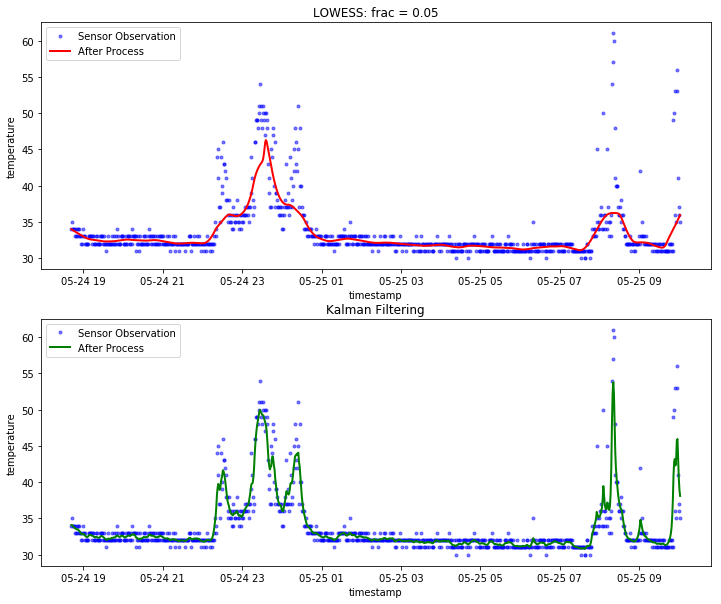

In [9]:
plt.figure(figsize=(12, 10))
plt.subplot(2,1,1)
plt.title("LOWESS: frac = 0.05")
plt.ylabel('temperature')
plt.xlabel('timestamp')
plt.plot(cpu_data['timestamp'], cpu_data['temperature'], 'b.', alpha=0.5)
plt.plot(cpu_data['timestamp'], loess_smoothed[:, 1], 'r-',linewidth=2)
plt.legend(['Sensor Observation', 'After Process'])

plt.subplot(2,1,2)
plt.title("Kalman Filtering")
plt.ylabel('temperature')
plt.xlabel('timestamp')
plt.plot(cpu_data['timestamp'], cpu_data['temperature'], 'b.', alpha=0.5)
plt.plot(cpu_data['timestamp'], kalman_smoothed[:, 0], 'g-',linewidth=2)
plt.legend(['Sensor Observation', 'After Process'])
#plt.show() # easier for testing
plt.savefig('cpu.svg') # for final submission